In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
%store -r df
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,age,str_month_no,end_month_no,season,distance,start_hour,end_hour,duration_min,start_date,end_date
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,30,12,1,Winter,9.448761,16,15,1335.166667,31,01
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,52,12,1,Winter,30.711442,15,13,1313.333333,31,01
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,20,12,1,Winter,6.377721,14,2,726.716667,31,01
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,27,12,1,Winter,15.151413,23,0,36.383333,31,01
13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,27,12,1,Winter,15.151413,23,0,36.166667,31,01


In [21]:
df.shape

(1007069, 28)

In [22]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,age,str_month_no,end_month_no,season,distance,start_hour,end_hour,duration_min,start_date,end_date
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,30,12,1,Winter,9.448761,16,15,1335.166667,31,01
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,52,12,1,Winter,30.711442,15,13,1313.333333,31,01


In [100]:
df['start_hour'] = df['start_hour'].astype(str)
df['end_hour'] = df['end_hour'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007069 entries, 0 to 179123
Data columns (total 28 columns):
duration_sec               1007069 non-null int64
start_time                 1007069 non-null datetime64[ns]
end_time                   1007069 non-null datetime64[ns]
start_station_id           1007069 non-null int64
start_station_name         1007069 non-null object
start_station_latitude     1007069 non-null float64
start_station_longitude    1007069 non-null float64
end_station_id             1007069 non-null int64
end_station_name           1007069 non-null object
end_station_latitude       1007069 non-null float64
end_station_longitude      1007069 non-null float64
bike_id                    1007069 non-null int64
user_type                  1007069 non-null object
member_birth_year          1007069 non-null float64
member_gender              1007069 non-null object
Month-str                  1007069 non-null object
day                        1007069 non-null object
Week

### Time

In [23]:
df_time = df.drop(['start_time','end_time', 'age', 'start_station_id', 'start_station_name', 'end_station_name', 'start_station_name','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','end_station_id','member_birth_year', 'duration_sec'], axis=1)

In [24]:
df_time.head()

,bike_id,user_type,member_gender,Month-str,day,Weekday,str_month_no,end_month_no,season,distance,start_hour,end_hour,duration_min,start_date,end_date
0,96,Customer,Male,Dec,Sun,Weekend,12,1,Winter,9.448761,16,15,1335.166667,31,01
1,88,Customer,Female,Dec,Sun,Weekend,12,1,Winter,30.711442,15,13,1313.333333,31,01
4,3167,Subscriber,Female,Dec,Sun,Weekend,12,1,Winter,6.377721,14,2,726.716667,31,01
12,2311,Subscriber,Male,Dec,Sun,Weekend,12,1,Winter,15.151413,23,0,36.383333,31,01
13,3717,Subscriber,Male,Dec,Sun,Weekend,12,1,Winter,15.151413,23,0,36.166667,31,01


In [25]:
#columns = list(df_time.columns)
#df_time_2 = df_time[columns[0:3]+columns[6:7]+columns[5:6]+columns[12:13]+columns[2:5]+columns[13:]+columns[6:8]+columns[9:12]+columns[8:9]   ]
#df_time_2.head()

In [54]:
df_day_count = df_time['day'].value_counts().reset_index()
df_day_count

,index,day
0,Tue,182011
1,Wed,181538
2,Thu,176165
3,Mon,159211
4,Fri,156188
5,Sat,81331
6,Sun,70625


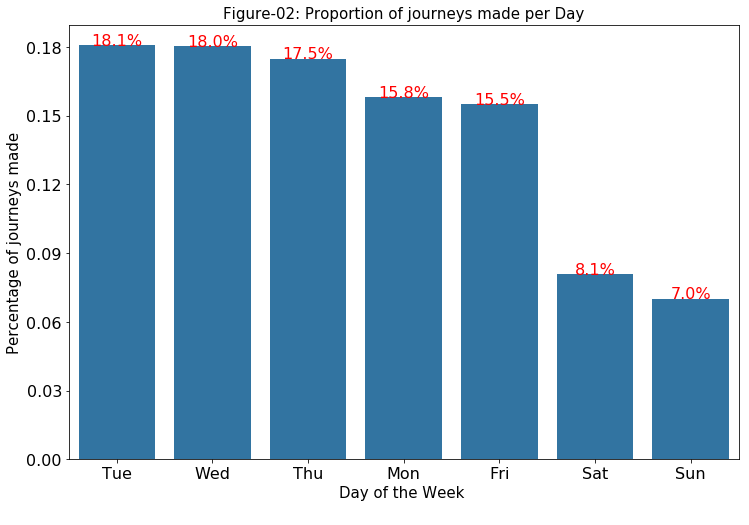

In [55]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [12, 8])
base_color = sns.color_palette()[1]
n_points = df_time['day'].value_counts().sum()
max_count = df_time['day'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['day'], color = base_color, order = df_time['day'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Day of the Week \n ",fontsize=15)
plt.ylabel("Percentage of journeys made",fontsize=15)
plt.title('Figure-01: Proportion of journeys made per Day',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [29]:
df.groupby(['Weekday']).mean().distance

Weekday
Weekday    16.354726
Weekend    16.136144
Name: distance, dtype: float64

In [61]:
df.groupby(['Weekday']).mean().duration_min

Weekday
Weekday    11.978987
Weekend    16.206515
Name: duration_min, dtype: float64

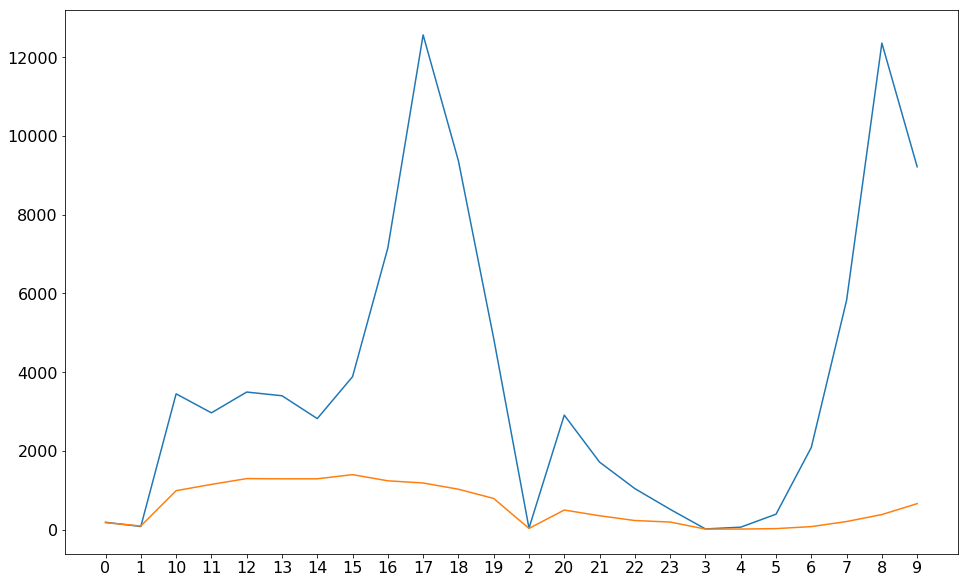

In [146]:
plt.figure(figsize = [16, 10])
sns.color_palette()
base_color = sns.color_palette()[0]

df_weekday_summer = df.query('Weekday == "Weekday" & season == "Summer"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_summer = df.query('Weekday != "Weekday" & season == "Summer"').groupby(['start_hour']).count().start_time.reset_index()

x_1=df_weekday_summer['start_hour']
y_1=df_weekday_summer['start_time']

x_2 =df_weekend_summer['start_hour']
y_2 =df_weekend_summer['start_time']



plt.plot(x_1, y_1, x_2, y_2)
plt.show()


**Note:**

**1. Most Journeys are made during the middle of the week Tuesday- Thursday and the least during the weekend.**

**2. Average Distance covered during the weekend is almost similar to the weekdays although the number journeys are much higher during the weekdays.**

**2. Average durations of the journyes during the weekend is higher than the journys during the weekdays.**


In [59]:
df_time['season'].value_counts()

Spring    381683
Autumn    261355
Winter    258932
Summer    105099
Name: season, dtype: int64

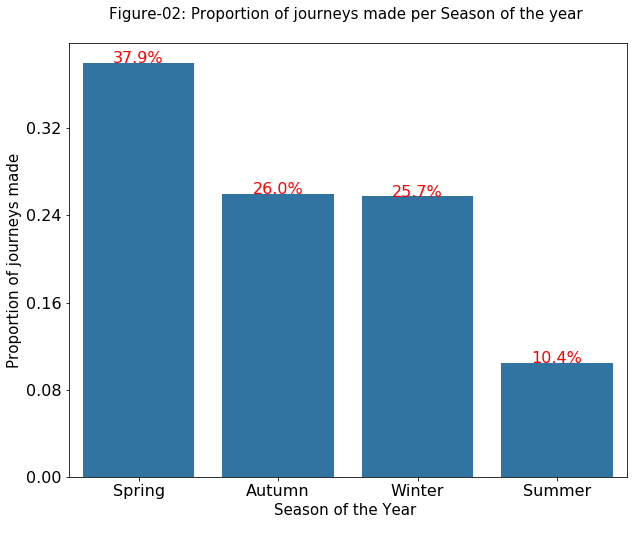

In [58]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 8])
base_color = sns.color_palette()[1]
n_points = df_time['season'].value_counts().sum()
max_count = df_time['season'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['season'], color = base_color, order = df_time['season'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['season'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [30]:
df.groupby(['Weekday']).mean().duration_min

Weekday
Weekday    11.978987
Weekend    16.206515
Name: duration_min, dtype: float64

In [31]:
df_gender_duration = df.groupby(['member_gender', 'Weekday']).mean().duration_min.reset_index()
df_weekday_distance = df.groupby(['member_gender','Weekday']).mean().distance.reset_index()
df_gender_journey = pd.merge(df_weekday_distance, df_gender_duration)
df_gender_journey

,member_gender,Weekday,distance,duration_min
0,Female,Weekday,17.192246,13.978821
1,Female,Weekend,16.921841,19.578270
2,Male,Weekday,16.083816,11.338306
3,Male,Weekend,15.816395,14.911957
4,Other,Weekday,17.604907,14.609518
5,Other,Weekend,17.063700,17.214776


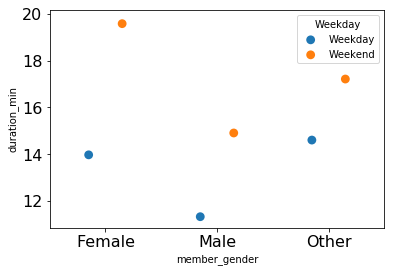

In [32]:
ax = sns.pointplot(data = df_gender_journey, x = 'member_gender', y = 'duration_min', hue = 'Weekday',
                  dodge = 0.3, linestyles = "")


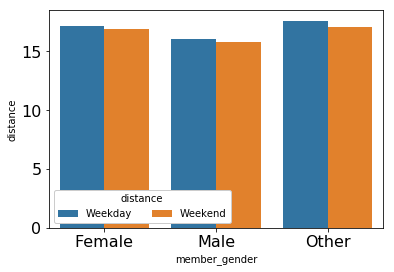

In [47]:
ax = sns.barplot( data = df_gender_journey, x = 'member_gender', y = 'distance', hue = 'Weekday')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'distance')

In [ ]:
df_season_duration = df.groupby(['season', 'Weekday']).mean().duration_min.reset_index()
df_season_duration

In [ ]:
ax = sns.pointplot(data = df_season_duration, x = 'season', y = 'duration_min', hue = 'Weekday',
                  dodge = 0.3, linestyles = "")

In [ ]:
plt.plot(season, pop_pakistan, color='g')